# Data Science Capstone Project 2 - Healthcare
### DESCRIPTION

#### Problem Statement

•	NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

•	The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

•	Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description

The datasets consist of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.


In [1]:
#Importing Required Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv('health care diabetes.csv')

In [3]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Project Task: Week 1
### Data Exploration:

##### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
• Glucose
 • BloodPressure
 • SkinThickness
 • Insulin
 • BMI


In [6]:
#copying the same dataframe
diabetes_nan= diabetes.copy(deep = True)

In [7]:
#Converting all zeros to 'NaN' or null value
diabetes_nan[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_nan[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
#Dataframe
diabetes_nan.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
## showing the count of NaN or Nulls
print(diabetes_nan.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [10]:
#Convertion of Nulls to mean value
diabetes_nan['Glucose'].fillna(diabetes_nan['Glucose'].mean(), inplace = True)
diabetes_nan['BloodPressure'].fillna(diabetes_nan['BloodPressure'].mean(), inplace = True)
diabetes_nan['SkinThickness'].fillna(diabetes_nan['SkinThickness'].median(), inplace = True)
diabetes_nan['Insulin'].fillna(diabetes_nan['Insulin'].median(), inplace = True)
diabetes_nan['BMI'].fillna(diabetes_nan['BMI'].median(), inplace = True)

In [11]:
## showing the count of Nans
print(diabetes_nan.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


As value 0 doesn't make sense with 5 mentioned variables to analyze the data, we have filled the missing values with mean or average data points 

#### 2. Visually explore these variables using histograms. Treat the missing values accordingly.

(array([  4.,  19.,  87., 149., 161., 130.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <a list of 10 Patch objects>)

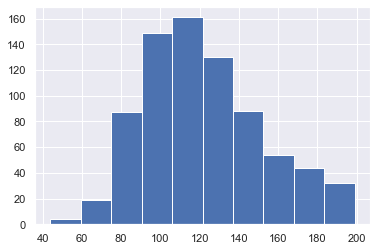

In [12]:
#Histogram of 'Glucose'
plt.hist(diabetes_nan['Glucose'])

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <a list of 10 Patch objects>)

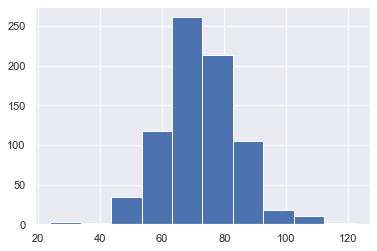

In [13]:
#Histogram of 'Blood Pressure'
plt.hist(diabetes_nan['BloodPressure'])

(array([ 59., 141., 408., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <a list of 10 Patch objects>)

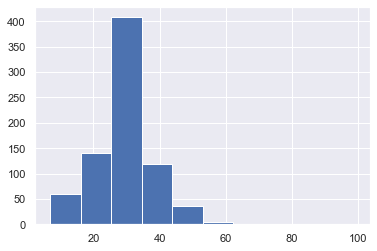

In [14]:
#Histogram of 'Skin Thickness'
plt.hist(diabetes_nan['SkinThickness'])

(array([142., 517.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <a list of 10 Patch objects>)

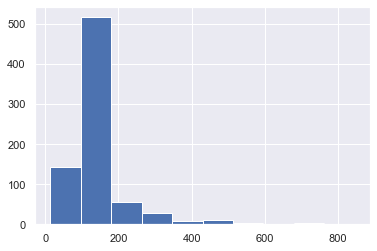

In [15]:
#Histogram of 'Insulin'
plt.hist(diabetes_nan['Insulin'])

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <a list of 10 Patch objects>)

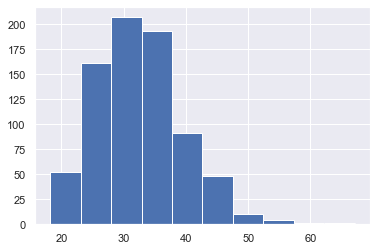

In [16]:
#Histogram of 'BMI'
plt.hist(diabetes_nan['BMI'])

#### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

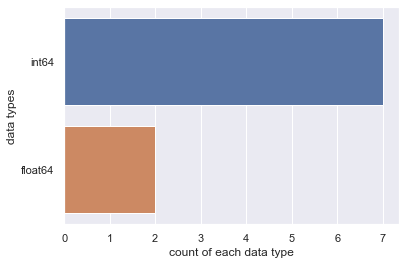

In [17]:
sns.countplot(y=diabetes.dtypes.map(str),data=diabetes)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

## Project Task: Week 2
### Data Exploration:
#### 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [18]:
## checking the balance of the data by plotting the count of outcomes by their value
print(diabetes.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


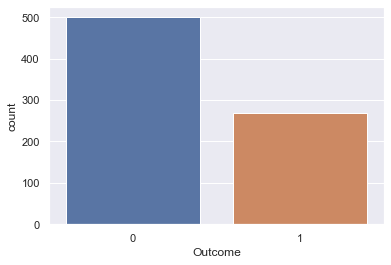

In [19]:
sns.countplot(diabetes.Outcome)

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [20]:
#copying the clean dataset to 'diabetes_data'
diabetes_data = diabetes_nan.copy(deep = True)

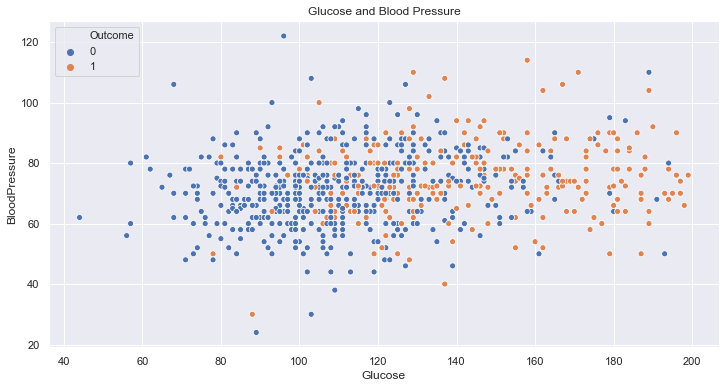

In [21]:
plt.figure(figsize= (12,6))
plt.title("Glucose and Blood Pressure")
sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=diabetes_data);

The above scatter plot between Glucose and Blood Pressure shows that
Patients with high blood pressure and higher glucose level have more chances to be diabetic.

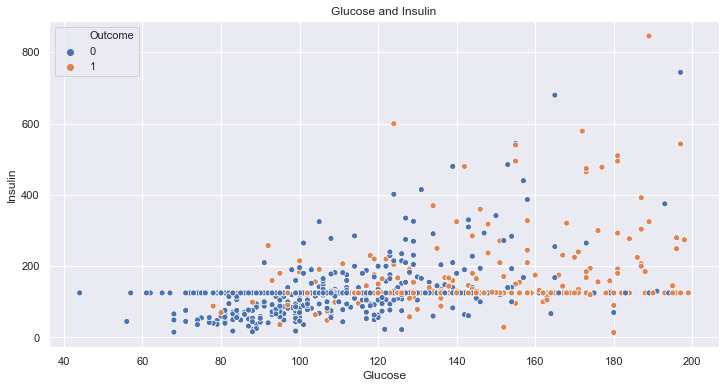

In [22]:
plt.figure(figsize= (12,6))
plt.title("Glucose and Insulin")
sns.scatterplot(x= "Glucose" ,y= "Insulin",
              hue="Outcome",
              data=diabetes_data);

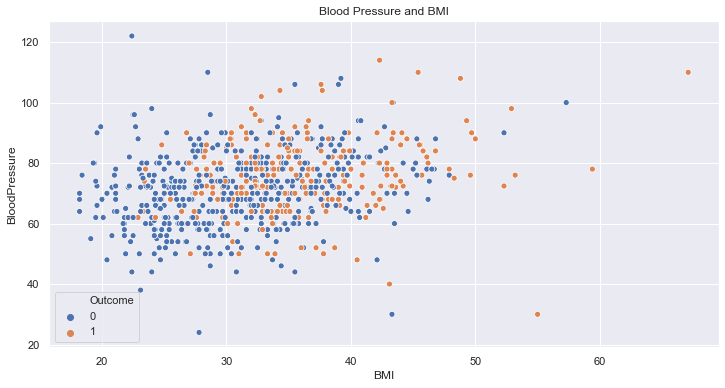

In [22]:
plt.figure(figsize= (12,6))
plt.title("Blood Pressure and BMI")
sns.scatterplot(x= "BMI" ,y= "BloodPressure",
              hue="Outcome",
              data=diabetes_data);

Diabetic patients with high blood pressure tend to have high BMI

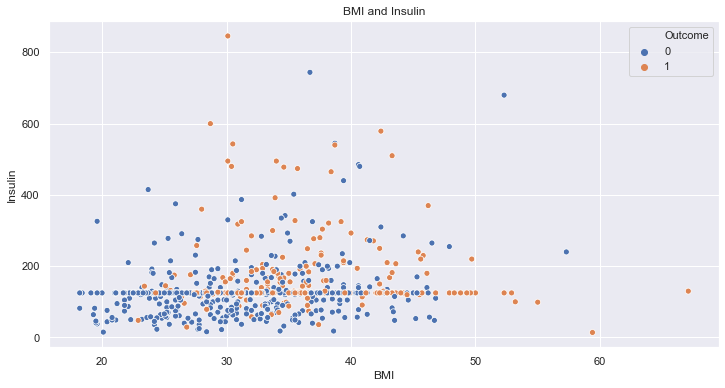

In [23]:
plt.figure(figsize= (12,6))
plt.title("BMI and Insulin")
sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=diabetes_data);

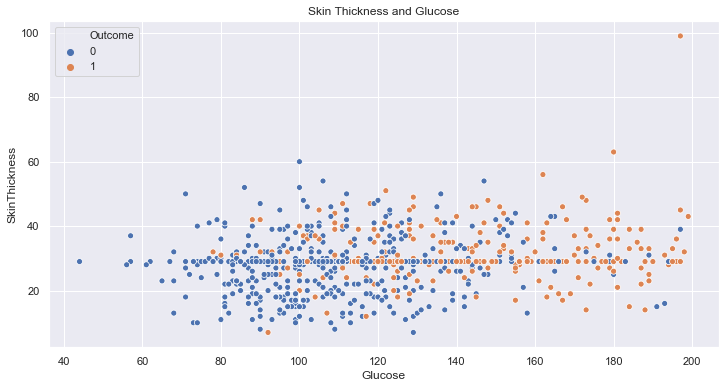

In [24]:
plt.figure(figsize= (12,6))
plt.title("Skin Thickness and Glucose")
sns.scatterplot(x= "Glucose" ,y= "SkinThickness",
              hue="Outcome",
              data=diabetes_data);

Skin thickness doesn't seem to be an indicator for diabetes

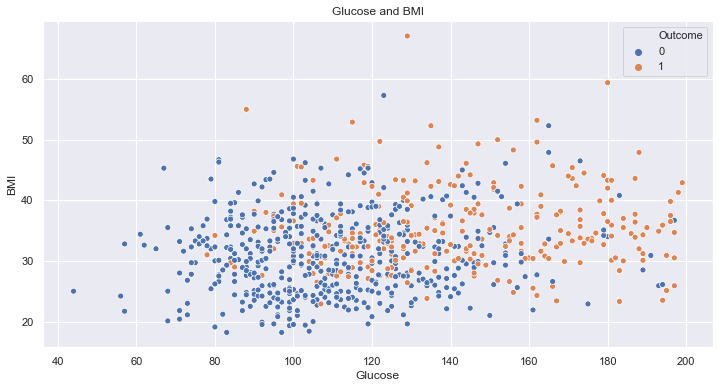

In [25]:
plt.figure(figsize= (12,6))
plt.title("Glucose and BMI")
sns.scatterplot(x= "Glucose" ,y= "BMI",
              hue="Outcome",
              data=diabetes_data);

Patients with higher glucose levels have chances to be diabetic

#### 3. Perform correlation analysis. Visually explore it using a heat map.

In [26]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


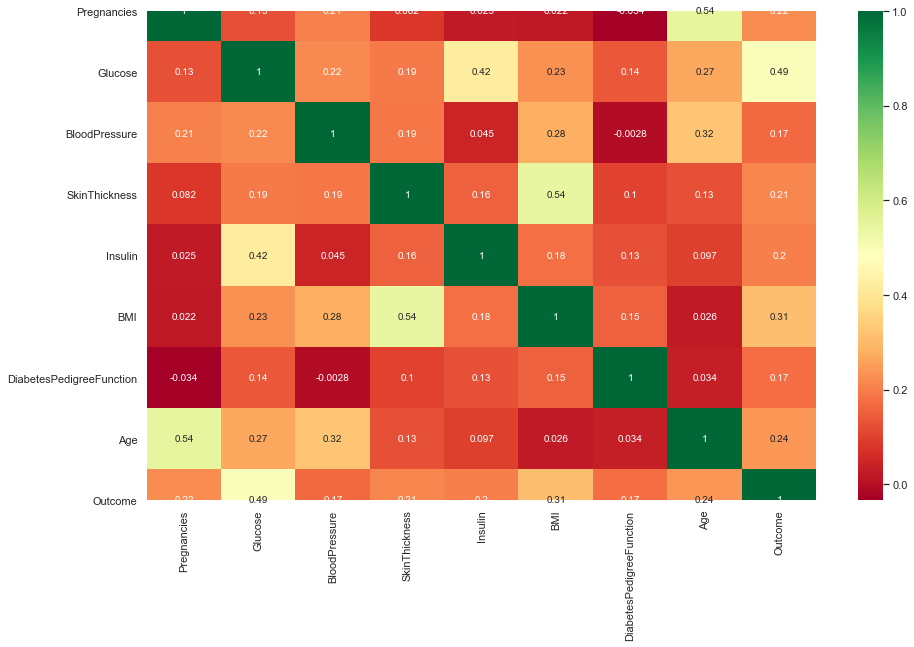

In [27]:
plt.figure(figsize=(15,9))
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn') 

## Project Task: Week 3
### Data Modeling:
#### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
#### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.


In [36]:
#Importing libraries for modelling
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [29]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


As observed above we have 768 entries and 9 columns. First 8 columns represent the features and the last column represent the target. Hence splitting data into 2 dataframe X (feature)  and y (target)

In [30]:
X=diabetes_data.drop(["Outcome"],axis=1)
y=diabetes_data["Outcome"]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0, stratify=y)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("Accuracy of Logistic Regression: " ,round(metrics.accuracy_score(predicted,y_test),2))

Accuracy of Logistic Regression:  0.78


In [33]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("Accuracy of Decision Tree Classifier: " ,round(metrics.accuracy_score(predicted,y_test),2))

Accuracy of Decision Tree Classifier:  0.69


In [34]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',round(metrics.accuracy_score(predicted,y_test),2))

Accuracy for SVM kernel= rbf is 0.65
Accuracy for SVM kernel= linear is 0.76


In [37]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("Accuracy of Random Forest Classifier: " ,round(metrics.accuracy_score(predicted,y_test),2))

Accuracy of Random Forest Classifier:  0.78


In [38]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

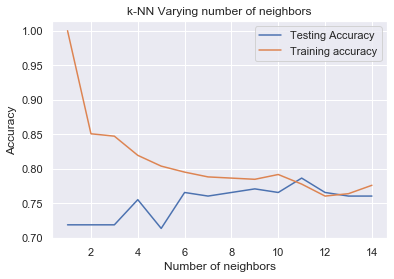

In [39]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

As we get maximum testing accuracy 11, lets create KNN model with number of classifiers =11

In [40]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
print("Accuracy of KNN: " ,round(knn.score(X_test,y_test),2))

Accuracy of KNN:  0.79


#### Comparison of all models

In [41]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','Random Forest','KNN']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors=11)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.755208
Radial Svm,0.651042
Logistic Regression,0.776042
Decision Tree,0.713542
Random Forest,0.729167
KNN,0.786458


upon comparing all machine learning models, KNN is proving high accuracy with number of neighbours =11

## Project Task: Week 4
### Data Modeling:
#### 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.


Lets create confusion matrix for summarizing the performance of a classification algorithm using KNN model

In [42]:
#import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [43]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,109,16,125
1,25,42,67
All,134,58,192


In [44]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [45]:
pd.DataFrame(cnf_matrix)

,0,1
0,109,16
1,25,42


Text(0.5, 21.5, 'Predicted label')

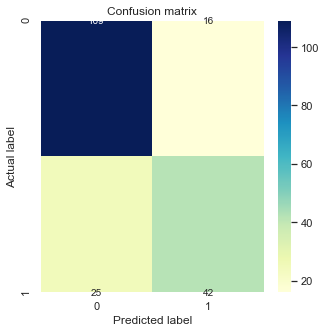

In [46]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

According to the confusion matrix :
* True Positive (TP) = 109 , which indicates Dr. has correctly predicted that the patient has disease
* False Positive (FP) = 16 , Type I error  
* True Negative (TN) = 42 , which indicates Dr. has correctly predicted that the patient doesn't have the disease
* False Negative (FN)= 25 , Type II error

## Classification Report
     -Summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.
### Precision Score 
    -The ratio of correctly predicted positive observations to the total predicted positive observations. 
    -Precision = TP/TP+FP
### Recall (Sensitivity)
    -The ratio of correctly predicted positive observations to the all observations
    -Recall = TP/TP+FN    
### F1 score 
    - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false  negatives into account. 
    - F1 = 2 x (precision x recall)/(precision + recall)

In [47]:
#import classification_report
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.72      0.63      0.67        67

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.78      0.79      0.78       192



So, we have got 78% f1-score

## AUC(RUC) Curve

In [49]:
from sklearn.metrics import roc_curve

In [50]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

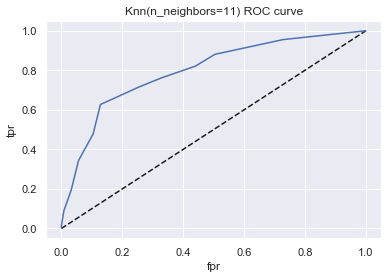

In [51]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [54]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
print("AUC score: " ,round(roc_auc_score(y_test,y_pred_proba),2))

AUC score:  0.8


ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no).

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

#### Exporting dataset to create tableau report

In [59]:
diabetes_data.to_excel(r'Diabetes Dataset.xlsx',index = False)